In [1]:
from model import Model
import torch

# Initialize model
MODEL_NAME = "google/paligemma2-3b-pt-224"
model = Model(MODEL_NAME, torch.device("cuda:0"))

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
from fetch_images import fetch_all_images_for
import data_constants as dc

# Prepare dataset
overall_category = dc.ANIMAL_OVERALL_CATEGORY
data: dict[str, list[str]] = dc.shorten_dict(dc.ANIMAL_DATA)

categories = list(data.keys())
image_paths: dict[str, list[str]] = fetch_all_images_for(data, "data/images")

In [3]:
from data_processing import DataProcessing

# Calculate embeddings
data_processing = DataProcessing(model)

embeddings_path: str = f'data/embeddings/{overall_category}_embeddings.pt'
embeddings = data_processing.load_embeddings(embeddings_path)
if embeddings is None or len(embeddings) == 0:
    print("No embeddings found, calculating from scratch...")
    embeddings = data_processing.get_image_tokens(data, image_paths)
    data_processing.save_embeddings(embeddings, embeddings_path)
else:
    print("Existing embeddings found and loaded successfully.")

Existing embeddings found and loaded successfully.


In [4]:
dirs = data_processing.estimate_dirs_from_embeddings(embeddings, overall_category)

Estimating directions for embeddings...


Plotting category clusters...


RuntimeError: Boolean value of Tensor with more than one value is ambiguous

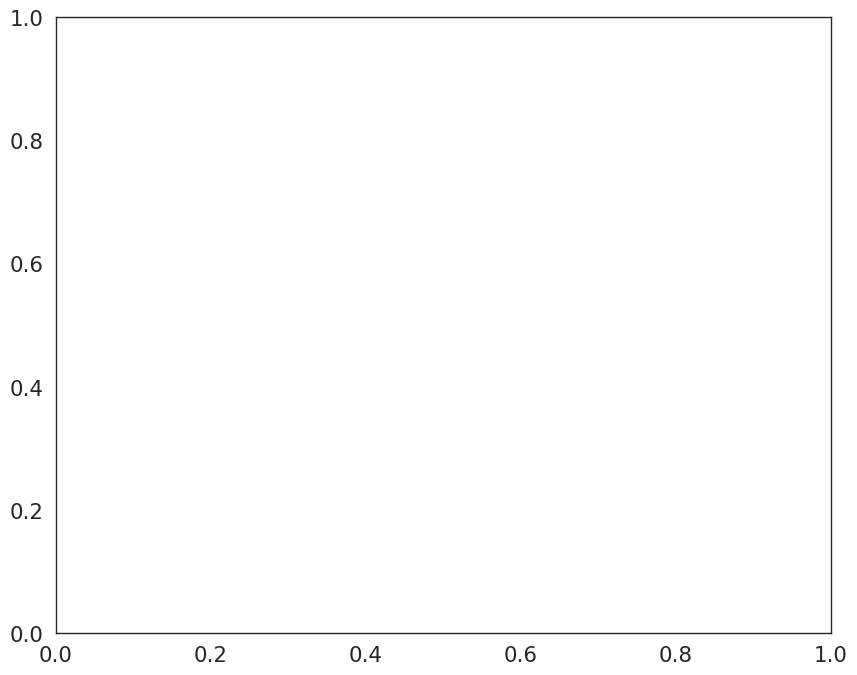

In [5]:
from plotting import plot_category_clusters

# Visualize using a plot
print("Plotting category clusters...")
# --- Plot 1: Overall Category vs Sub-Category ---
plot_category_clusters(overall_category, categories[0], dirs, embeddings, model.g)

# # --- Plot 2: Sub-Category vs Sub-Category (1) ---
plot_category_clusters(categories[0], categories[1], dirs, embeddings, model.g)

# # --- Plot 3: Sub-Category vs Sub-Category (2) ---
plot_category_clusters(categories[1], categories[2], dirs, embeddings, model.g)
